In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

EDA

In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [3]:
df = df.fillna(df.mean()).copy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [9]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [4]:
df.drop(df.loc[df['gender']=='Other'].index, inplace=True)

In [5]:
categorical_features = [col for col in df.columns if df[col].dtype==object]

In [6]:
dummies = pd.get_dummies(df[categorical_features], drop_first=True)
#drop_first=True significa che non converte la prima colonna in numerica

df = df.drop(categorical_features, axis=1)
df = df.join(dummies)

In [13]:
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,1,0,0,1,0,0,0,1,0


In [15]:
df['gender'].value_counts()

KeyError: ignored

In [ ]:
df['gender'].dtype

#SCALER

In [7]:
X = df.copy()

In [8]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

#K MEANS

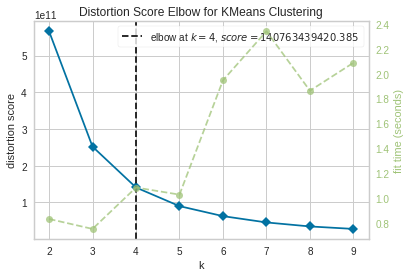

In [8]:
### usare l'elbow plot  pertrovare il numero di cluster adatto per performare una clusterizzazione con Kmeans
model = KMeans(random_state=22)
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

##SILHOUETTE


Avg Sihlouette Score:  0.62911107638234


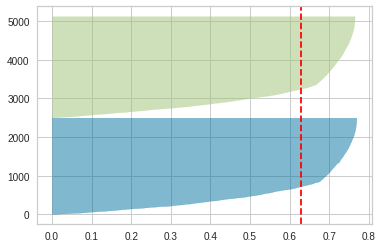


Avg Sihlouette Score:  0.5907945565413002


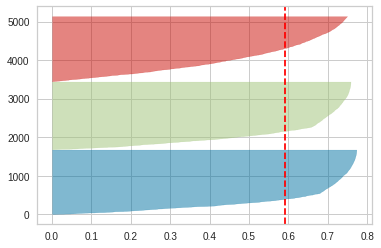


Avg Sihlouette Score:  0.5745429766395841


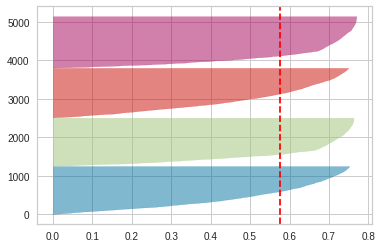


Avg Sihlouette Score:  0.5637133405235747


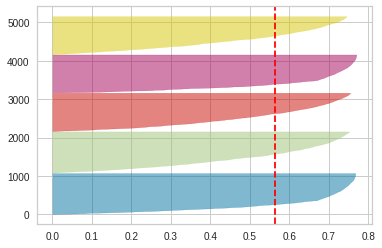


Avg Sihlouette Score:  0.554687244352422


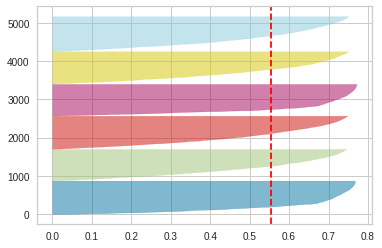

In [9]:
### generare anche il sihlouette plot
for n in range(2,7):
    model = KMeans(n_clusters=n, random_state=22)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(X)
    print('\nAvg Sihlouette Score: ', visualizer.silhouette_score_)
    plt.show()

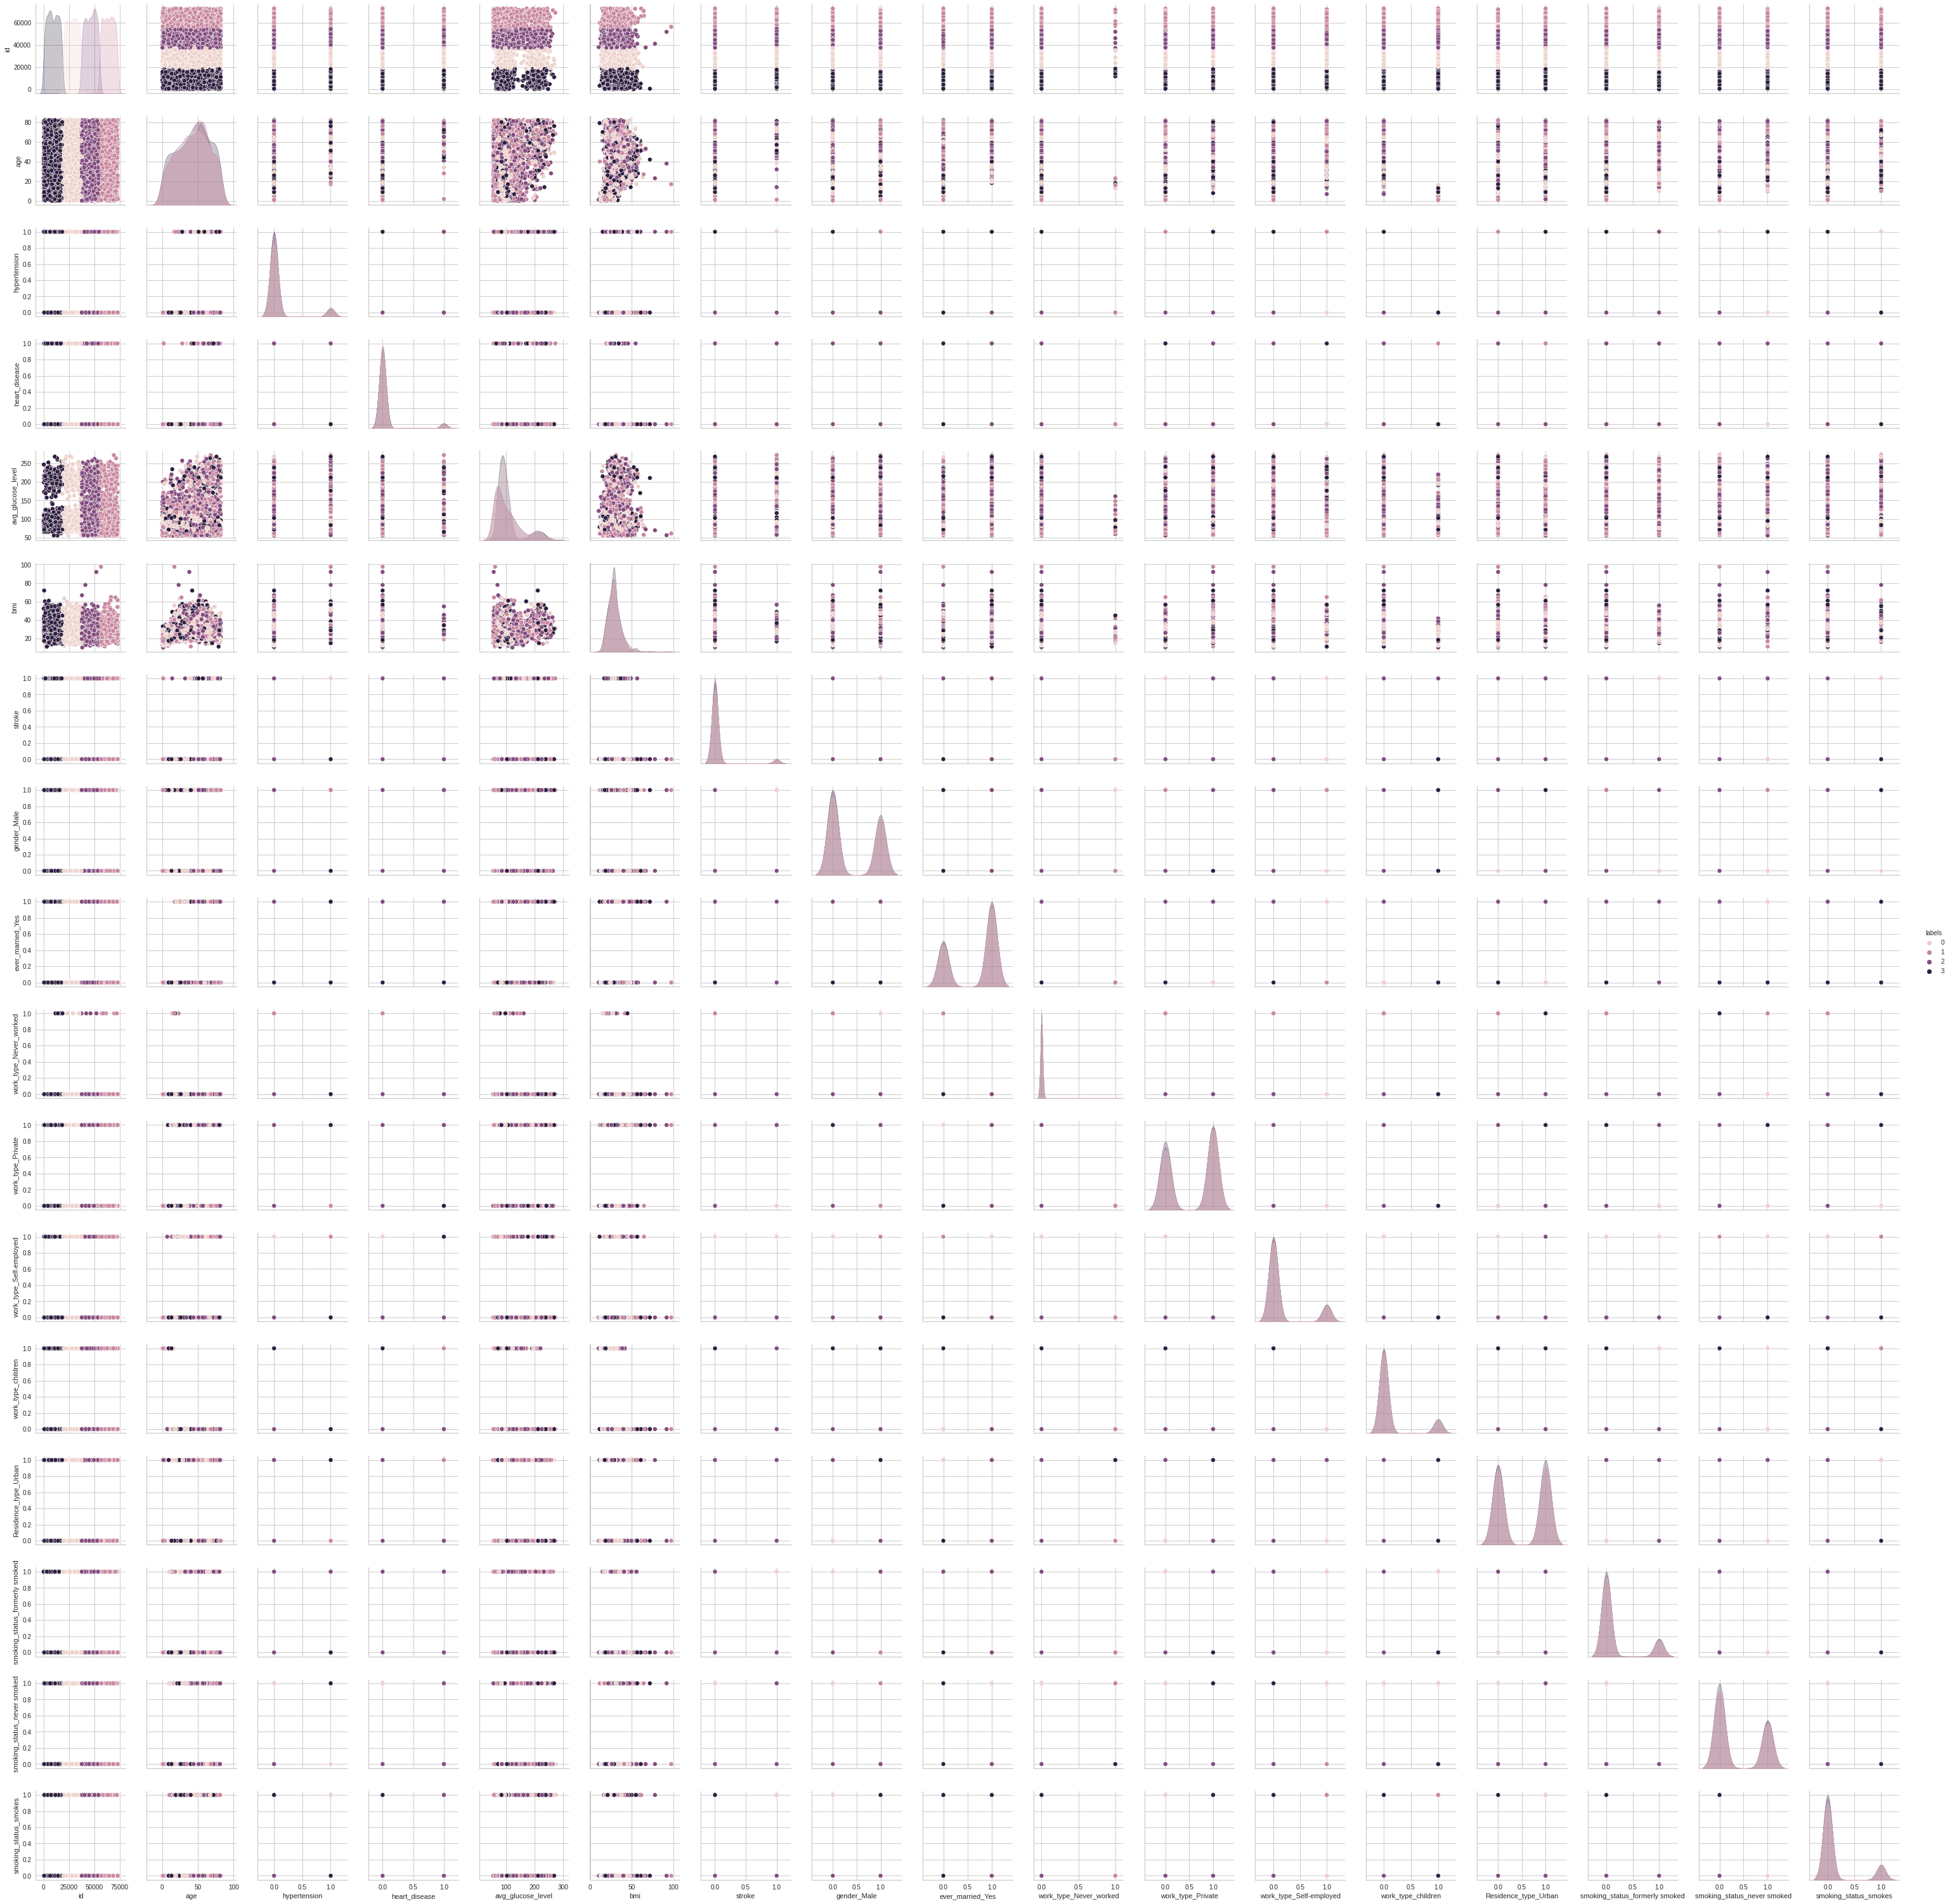

In [10]:
### plottare infine un pairplot usando come parametro 'hue' le labels generate dal KMeans scelto
model = KMeans(n_clusters=4)
model.fit(X)
labels = pd.Series(model.labels_, index=X.index, name='labels')
labeled_df = X.join(labels)
sns.pairplot(labeled_df, hue='labels')
plt.show()


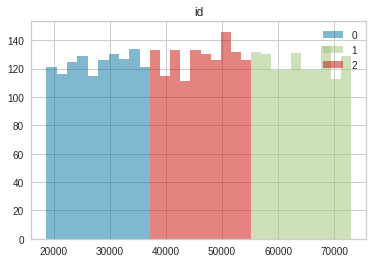

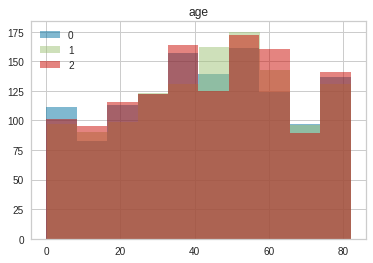

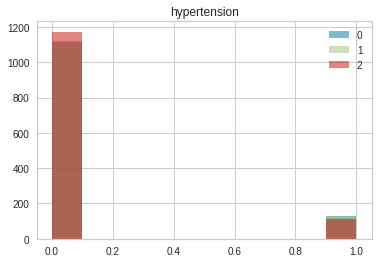

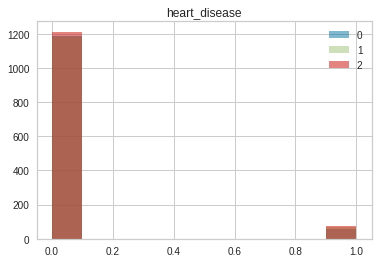

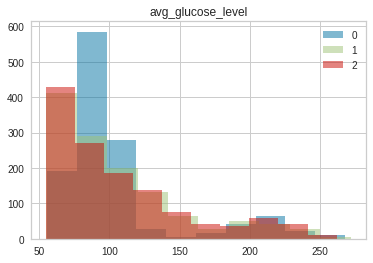

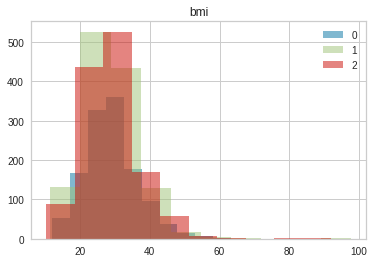

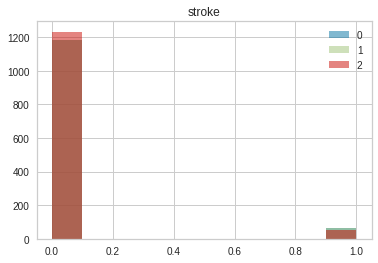

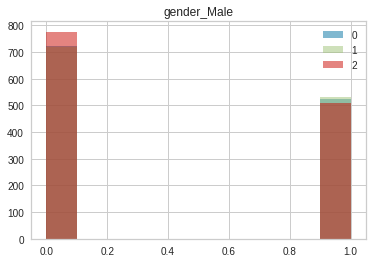

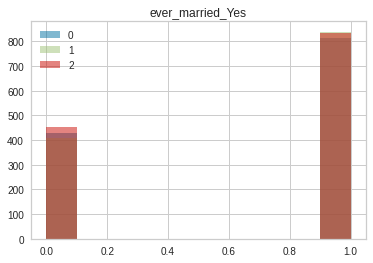

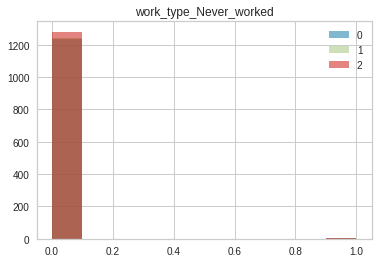

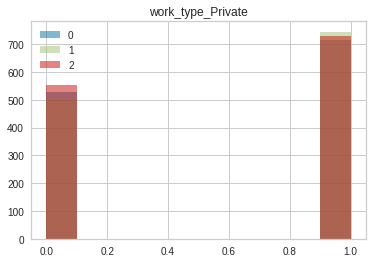

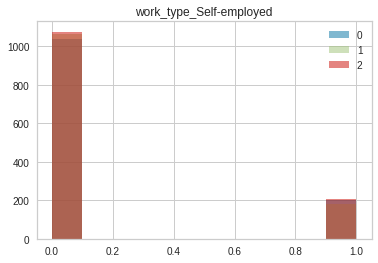

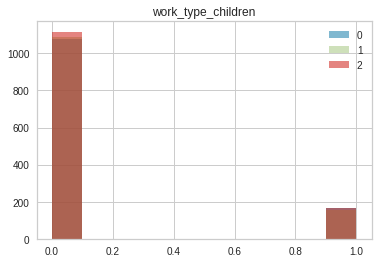

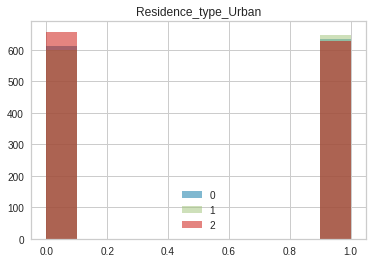

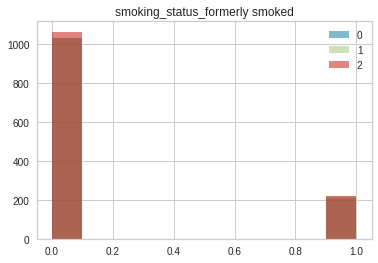

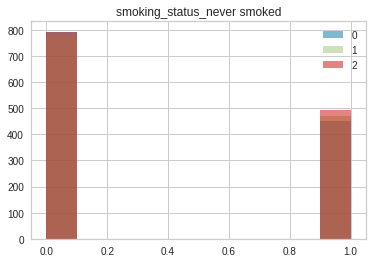

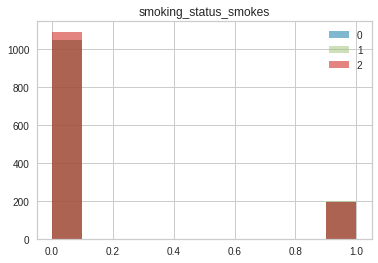

In [11]:
for feature in X.columns:
  for cluster in [0,1,2]:
    cond = labeled_df['labels']==cluster
    new_df = labeled_df[cond].copy()

    new_df[feature].hist(label=cluster, alpha=0.5)
  plt.legend()
  plt.title(feature)
  plt.show()

In [12]:
label1_df = labeled_df[labeled_df['labels']==0].copy()

In [ ]:
sns.displot(label1_df)

#GERARCHICO

##DENDROGRAM

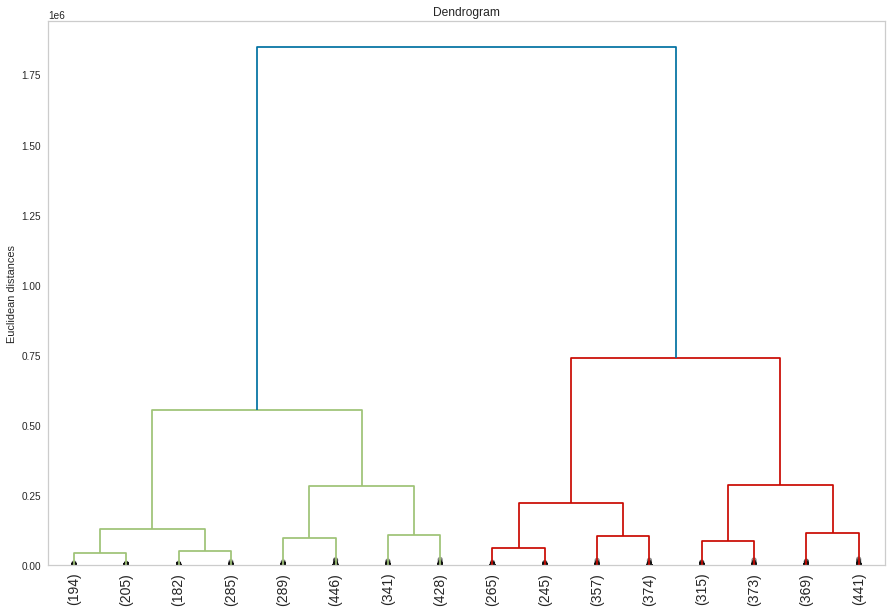

In [9]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances')
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'), labels=X.index, p=3, truncate_mode='level', show_contracted=True)
plt.xticks(rotation=90, fontsize=14)
plt.show()

##AGGLOMERATIVE CLUSTERING

In [10]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
model = model.fit(X)
labels = model.labels_

In [11]:
labels = pd.Series(labels, index = X.index, name='labels')
X = pd.DataFrame(X, index=X.index, columns=X.columns)

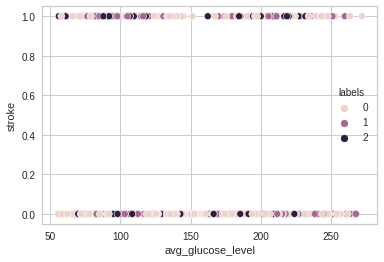

In [12]:
labels_df = X.join(labels)
sns.scatterplot(x='avg_glucose_level', y='stroke', data=labels_df, hue='labels')
plt.show()

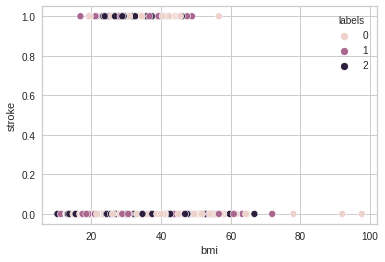

In [13]:
labels_df = X.join(labels)
sns.scatterplot(x='bmi', y='stroke', data=labels_df, hue='labels')
plt.show()